In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
data=df=pd.read_csv('/content/drive/MyDrive/Data/final_df_2.csv')

In [3]:
data_1=data

In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Frequency                     128655 non-null  object 
 1   InstlmentMode                 128655 non-null  object 
 2   LoanStatus                    128655 non-null  object 
 3   PaymentMode                   128655 non-null  object 
 4   Tenure                        128655 non-null  int64  
 5   AssetCost                     128655 non-null  int64  
 6   AmountFinance                 128655 non-null  float64
 7   DisbursalAmount               128655 non-null  float64
 8   EMI                           128655 non-null  float64
 9   LTV                           128655 non-null  float64
 10  SEX                           128596 non-null  object 
 11  AGE                           128596 non-null  float64
 12  MonthlyIncome                 128421 non-nul

In [5]:
data_1.drop(["Top-up Month-Binary"], axis=1,inplace=True)

In [6]:
data_1=data_1[data_1['Top-up Month']!="No Top-up Service"]

In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21978 entries, 0 to 128650
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frequency                     21978 non-null  object 
 1   InstlmentMode                 21978 non-null  object 
 2   LoanStatus                    21978 non-null  object 
 3   PaymentMode                   21978 non-null  object 
 4   Tenure                        21978 non-null  int64  
 5   AssetCost                     21978 non-null  int64  
 6   AmountFinance                 21978 non-null  float64
 7   DisbursalAmount               21978 non-null  float64
 8   EMI                           21978 non-null  float64
 9   LTV                           21978 non-null  float64
 10  SEX                           21966 non-null  object 
 11  AGE                           21966 non-null  float64
 12  MonthlyIncome                 21957 non-null  float64
 13  

In [8]:
data_1['Top-up Month'].value_counts()

 > 48 Months    8366
36-48 Months    3656
24-30 Months    3492
30-36 Months    3062
18-24 Months    2368
12-18 Months    1034
Name: Top-up Month, dtype: int64

In [9]:
data_1['P_ownership'] = data_1['P_ownership'].astype(str)
data_1['P_assetclass'] = data_1['P_assetclass'].astype(str)   #it has some nan values
data_1['P_account_status'] = data_1['P_account_status'].astype(str)

<ipython-input-9-61e432f307ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['P_ownership'] = data_1['P_ownership'].astype(str)
<ipython-input-9-61e432f307ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['P_assetclass'] = data_1['P_assetclass'].astype(str)   #it has some nan values
<ipython-input-9-61e432f307ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [10]:
data_1['P_assetclass'].value_counts()

2.0    15341
nan     6210
1.0      231
0.0      196
Name: P_assetclass, dtype: int64

In [11]:
data_1['P_assetclass'].isna().sum()

0

In [12]:
data_1['P_assetclass'].replace('nan',np.NaN,inplace=True)

<ipython-input-12-097fbf296f07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['P_assetclass'].replace('nan',np.NaN,inplace=True)


In [13]:
data_1['P_assetclass'].isna().sum()

6210

In [14]:
data_1['P_account_status'].value_counts()

2.0    12099
1.0     9129
0.0      749
nan        1
Name: P_account_status, dtype: int64

In [15]:
data_1['P_account_status'].replace('nan',np.NaN,inplace=True)

<ipython-input-15-ca17b611935a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['P_account_status'].replace('nan',np.NaN,inplace=True)


In [16]:
from sklearn.model_selection import train_test_split
X = data_1.drop("Top-up Month", axis=1)  # Features
y = data_1["Top-up Month"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [18]:
## As the data is skewed and not normally distributed we will apply median imputation
numerical_columns = data_1.select_dtypes(include=['int', 'float']).columns
categorical_columns = data_1.select_dtypes(include=['object', 'category']).drop("Top-up Month", axis=1).columns

# Create the column transformer with separate imputers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='median'), numerical_columns),
        ('cat_imputer', SimpleImputer(strategy='most_frequent'), categorical_columns),
    ])

# Fit and transform the training data
X_train_imputed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted transformer
X_test_imputed = preprocessor.transform(X_test)

In [19]:
categorical_columns

Index(['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'SEX',
       'P_assetclass', 'P_account_status', 'P_installment_frequency',
       'P_ownership'],
      dtype='object')

In [20]:
concatenated_index = numerical_columns.append(categorical_columns)
concatenated_index

Index(['Tenure', 'AssetCost', 'AmountFinance', 'DisbursalAmount', 'EMI', 'LTV',
       'AGE', 'MonthlyIncome', 'P_total_disbursed_amount',
       'P_total_writeoffamt', 'P_totalamtpaid', 'P_avg_current_bal_difference',
       'P_overdue_time_ratio', 'P_total_positive', 'P_total_negative',
       'self_indicator_ratio', 'P_paymentdone_ratio', 'P_avg_days_loan',
       'P_max_overdue', 'P_avg_overdue', 'Frequency', 'InstlmentMode',
       'LoanStatus', 'PaymentMode', 'SEX', 'P_assetclass', 'P_account_status',
       'P_installment_frequency', 'P_ownership'],
      dtype='object')

In [21]:
X_train_imputed = pd.DataFrame(X_train_imputed, columns=concatenated_index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns= concatenated_index)

In [22]:
X_train_imputed[numerical_columns] = X_train_imputed[numerical_columns].astype(float)
X_test_imputed[numerical_columns] = X_test_imputed[numerical_columns].astype(float)

In [23]:
X_train_imputed.value_counts()

Tenure  AssetCost  AmountFinance  DisbursalAmount  EMI       LTV    AGE   MonthlyIncome  P_total_disbursed_amount  P_total_writeoffamt  P_totalamtpaid  P_avg_current_bal_difference  P_overdue_time_ratio  P_total_positive  P_total_negative  self_indicator_ratio  P_paymentdone_ratio  P_avg_days_loan  P_max_overdue  P_avg_overdue  Frequency    InstlmentMode  LoanStatus  PaymentMode   SEX  P_assetclass  P_account_status  P_installment_frequency  P_ownership
24.0    555000.0   400000.0       400000.0         19220.0   72.07  40.0  41666.67       2261137.0                 0.0                  125361.25        465824.456522                0.039961              53.5              50.0              0.140351              0.005848             975.196078       165057.5       38009.280702   Monthly      Arrear         Closed      ECS           M    2.0           1.0               12                       0              2
                                                             68.61  40.0  1.00 

In [24]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Assuming you have a DataFrame called 'data' with columns to be encoded
# 'one_hot_cols' contains the column names for one-hot encoding
# 'ordinal_cols' contains the column names for ordinal encoding
one_hot_cols = ["InstlmentMode","LoanStatus","PaymentMode","SEX"]
ordinal_cols = ["Frequency"]

# Define the transformers for one-hot encoding and ordinal encoding
one_hot_transformer = OneHotEncoder(drop='first')
ordinal_transformer = OrdinalEncoder(categories=[['BI-Monthly', 'Monthly', 'Half Yearly','Quatrly']])

# Create the ColumnTransformer with separate transformers for different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', one_hot_transformer, one_hot_cols),
        ('ordinal', ordinal_transformer, ordinal_cols)
    ],remainder='passthrough')

# Apply the ColumnTransformer on the data
transformed_train_data = preprocessor.fit_transform(X_train_imputed)
transformed_test_data = preprocessor.transform(X_test_imputed)


In [25]:
# Get the column names for one-hot encoded columns
one_hot_column_names = preprocessor.transformers_[0][1].get_feature_names_out(one_hot_cols)
# Get the column names for ordinal encoded columns
ordinal_column_names = ordinal_cols
# Remainder column name
remain = ['Tenure', 'AssetCost', 'AmountFinance', 'DisbursalAmount', 'EMI', 'LTV',
       'AGE', 'MonthlyIncome', 'P_total_disbursed_amount',
       'P_total_writeoffamt', 'P_totalamtpaid', 'P_avg_current_bal_difference',
       'P_overdue_time_ratio', 'P_total_positive', 'P_total_negative',
       'self_indicator_ratio', 'P_paymentdone_ratio', 'P_avg_days_loan',
       'P_max_overdue', 'P_avg_overdue','P_assetclass', 'P_account_status',
       'P_installment_frequency', 'P_ownership']

# Concatenate the column names
transformed_column_names = np.concatenate((one_hot_column_names, ordinal_column_names,remain))

# Convert the transformed data to DataFrames with column names
transformed_train_df = pd.DataFrame(transformed_train_data, columns=transformed_column_names)
transformed_test_df = pd.DataFrame(transformed_test_data, columns=transformed_column_names)

In [26]:
transformed_train_df.drop(["P_installment_frequency"],axis = 1,inplace = True)
transformed_train_df=transformed_train_df.astype(float)

In [27]:
transformed_test_df.drop(["P_installment_frequency"],axis = 1,inplace = True)
transformed_test_df = transformed_test_df.astype(float)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Create the column transformer with separate transformers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num_scaler', MinMaxScaler(), numerical_columns)
    ], remainder='passthrough')

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(transformed_train_df)

# Transform the test data using the fitted transformer
X_test_scaled = preprocessor.transform(transformed_test_df)

In [30]:
transformed_column_names=preprocessor.get_feature_names_out()
transformed_column_names=[name.replace('num_scaler__', '').replace('remainder__','') for name in transformed_column_names]

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=transformed_column_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=transformed_column_names)

In [32]:
X_train_scaled[numerical_columns] = X_train_scaled[numerical_columns].astype(float)
X_test_scaled[numerical_columns] = X_test_scaled[numerical_columns].astype(float)

<Figure size 1000x600 with 0 Axes>

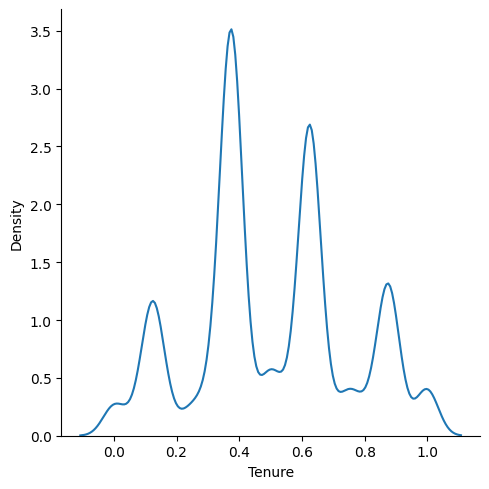

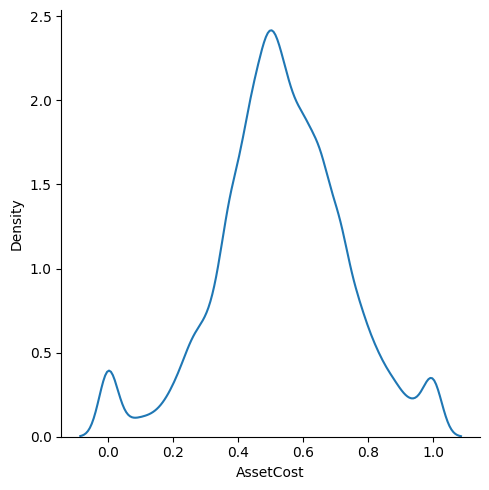

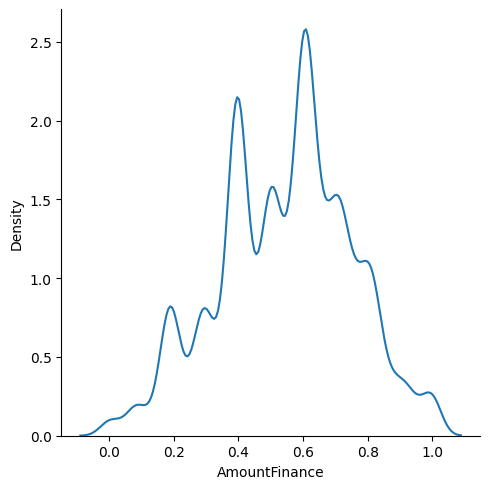

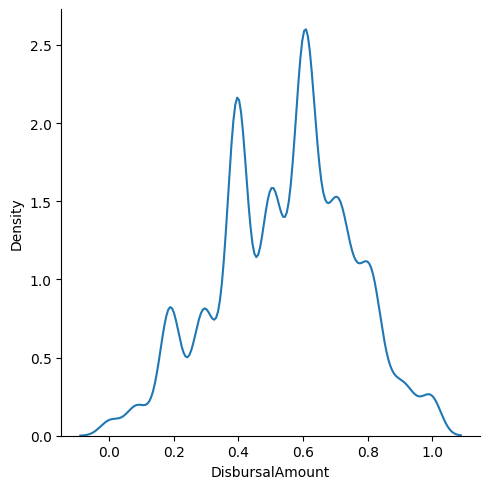

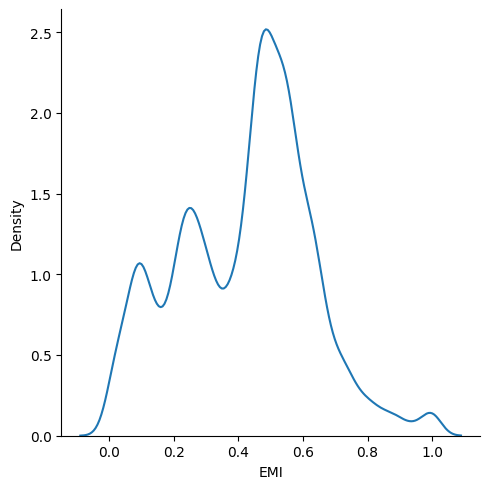

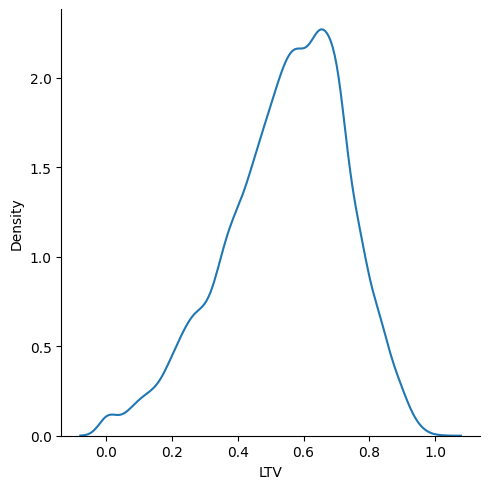

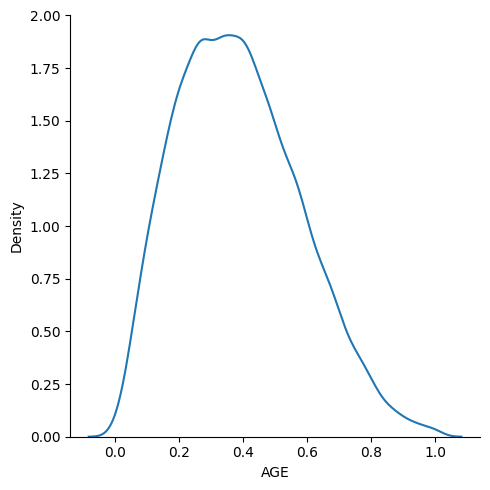

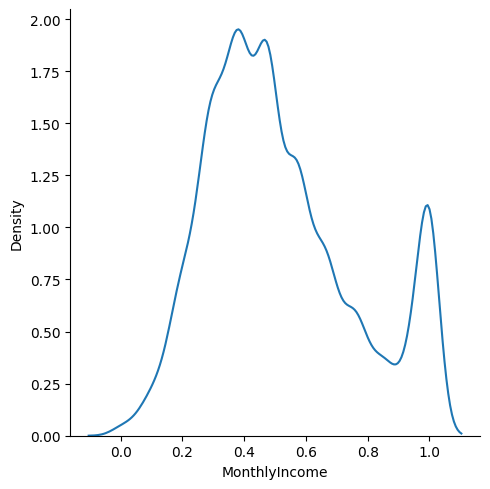

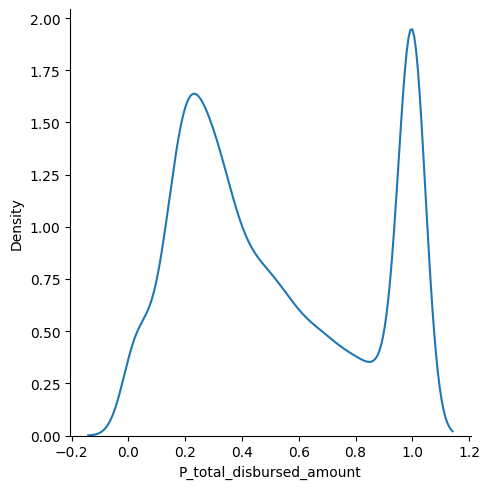

<ipython-input-33-f945ea016073>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(X_train_scaled[i],kind="kde")


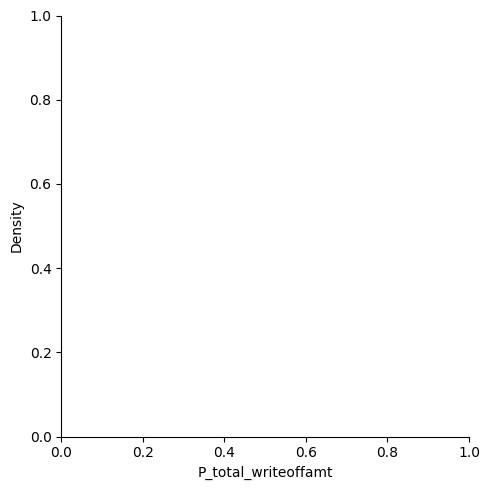

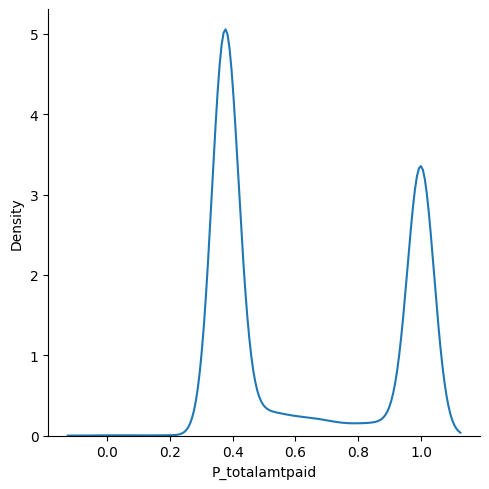

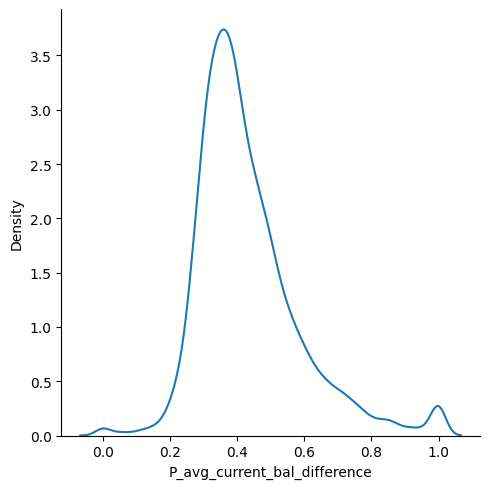

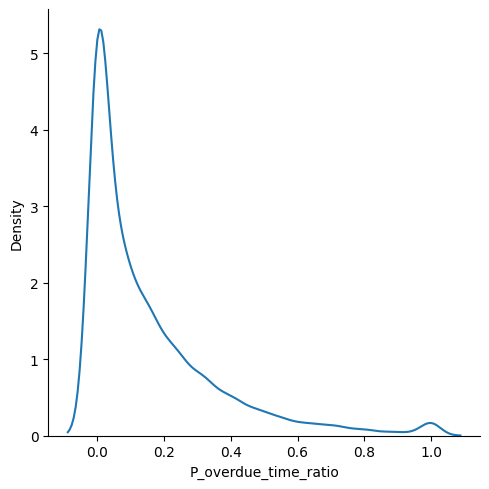

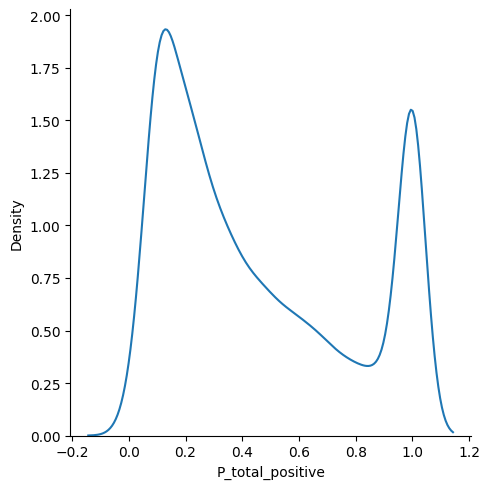

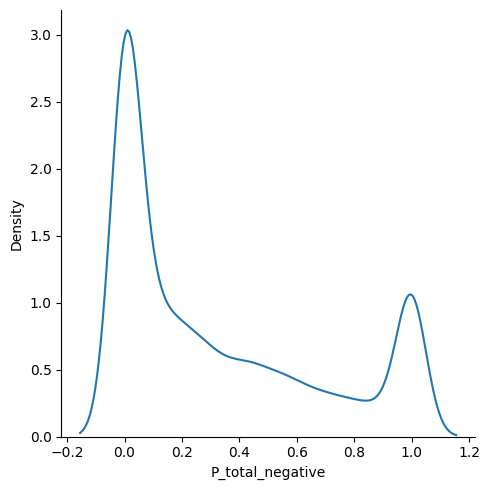

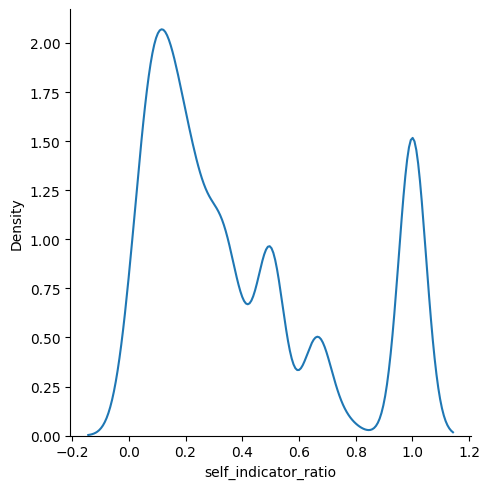

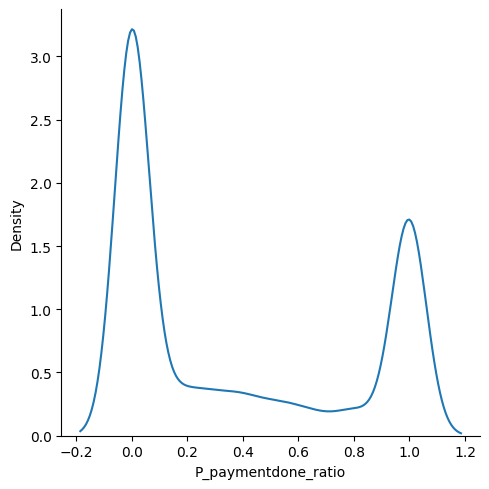

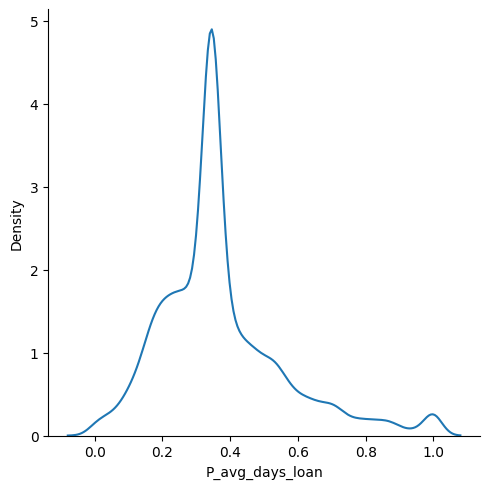

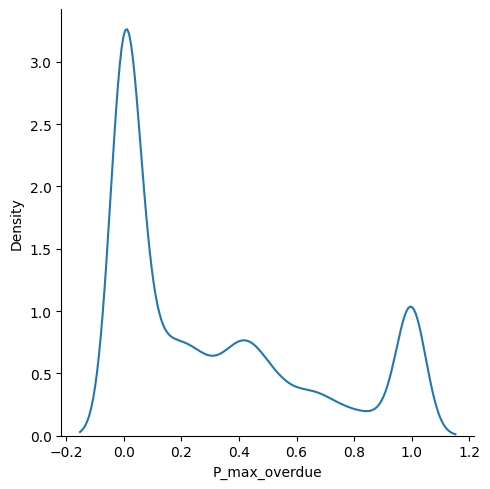

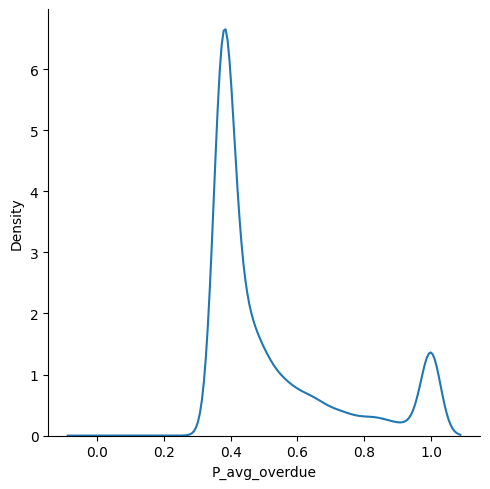

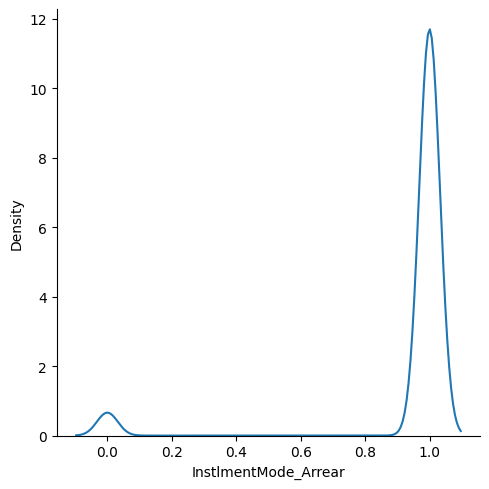

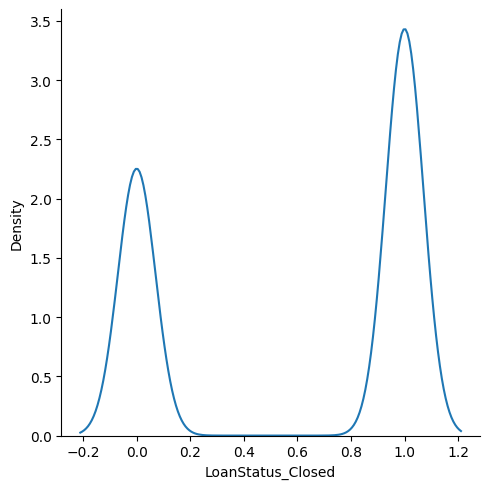

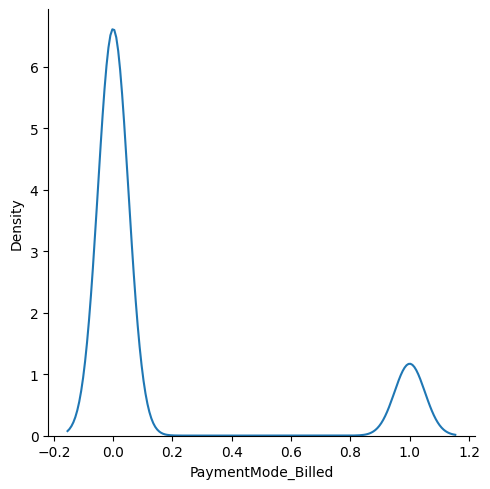

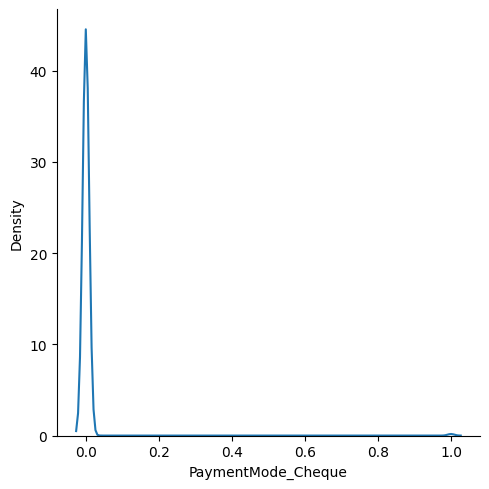

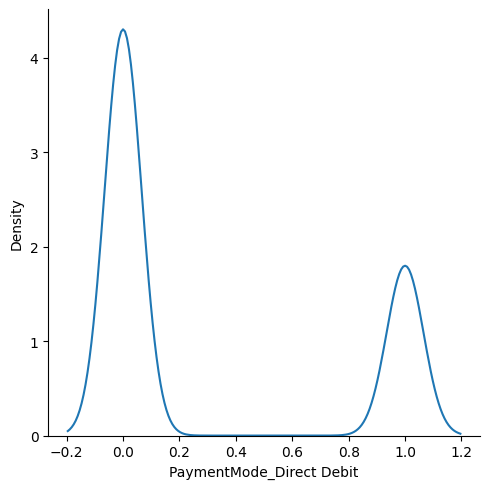

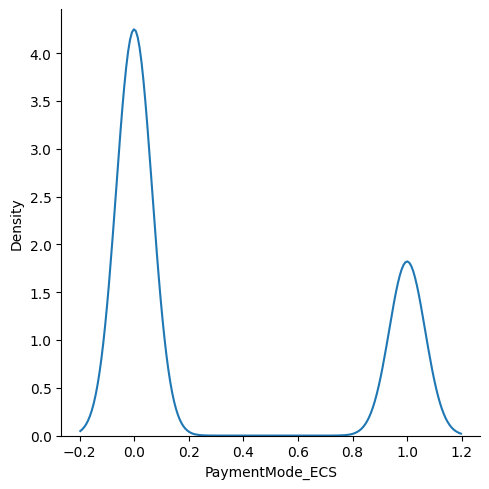

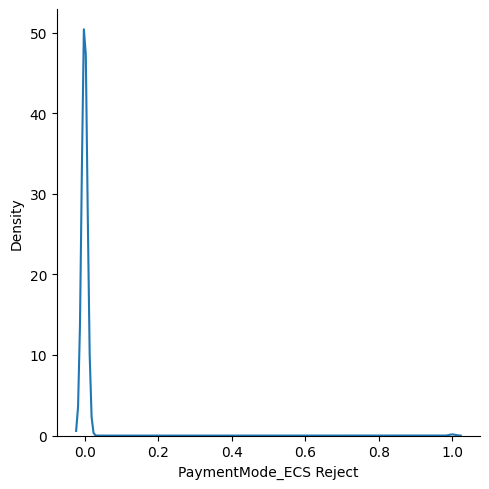

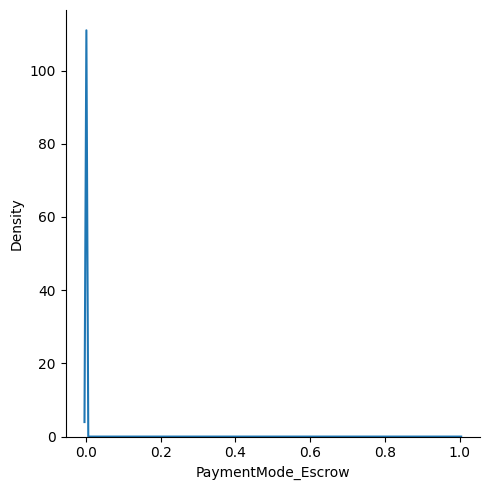

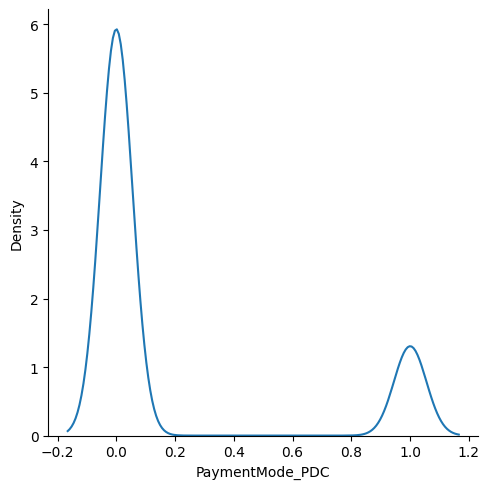

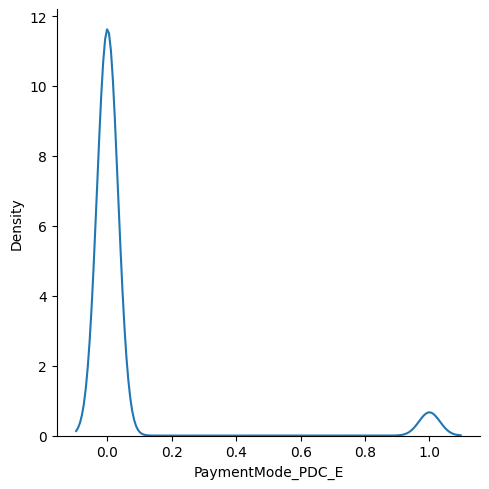

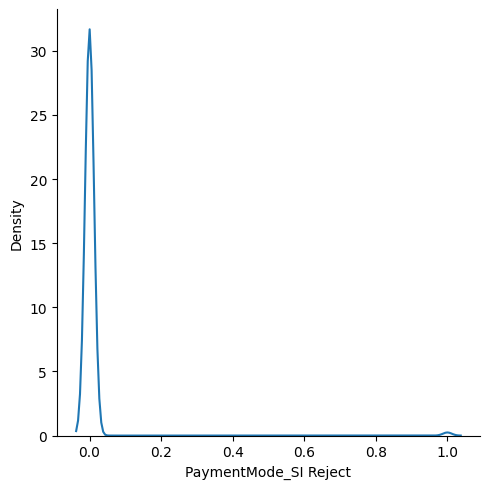

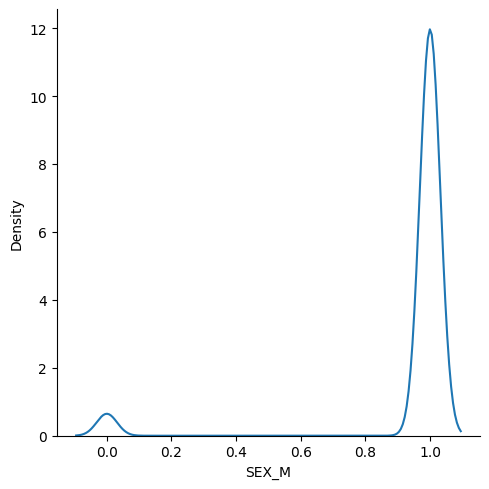

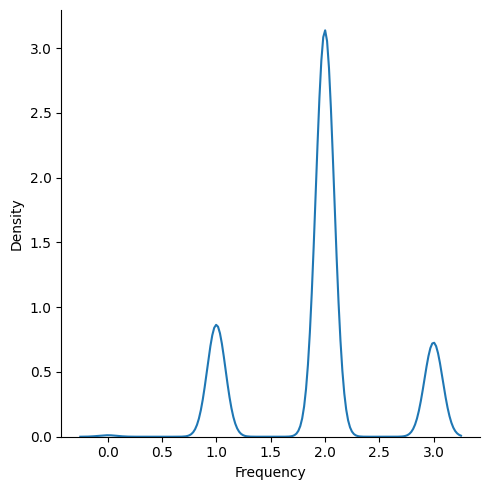

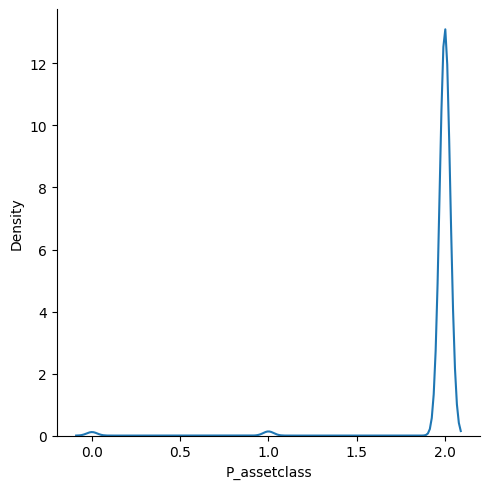

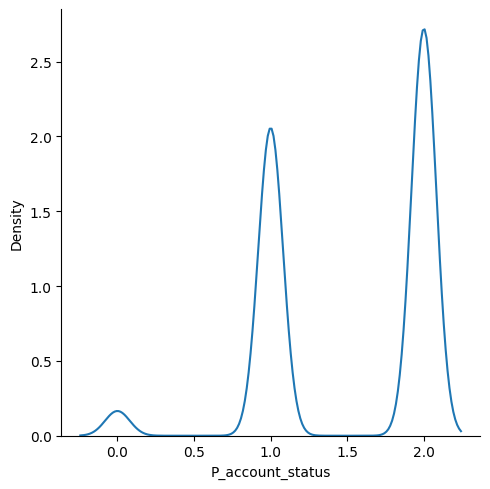

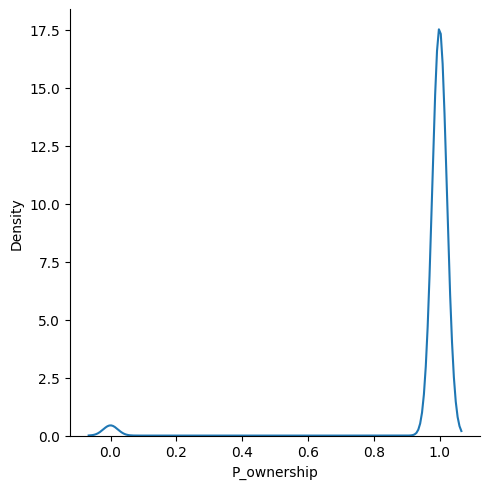

In [33]:
## Now we see the change in scale in graphs
plt.figure(figsize=(10,6))
for i in X_train_scaled.select_dtypes(include=['int', 'float']).columns:
    sns.displot(X_train_scaled[i],kind="kde")
    plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Create and fit the logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 > 48 Months       0.65      0.89      0.75      2051
12-18 Months       0.08      0.00      0.01       264
18-24 Months       0.36      0.33      0.34       610
24-30 Months       0.40      0.51      0.45       884
30-36 Months       0.43      0.34      0.38       772
36-48 Months       0.30      0.13      0.18       914

    accuracy                           0.52      5495
   macro avg       0.37      0.37      0.35      5495
weighted avg       0.46      0.52      0.48      5495



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#SMOTE+Logistic Regression
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_balanced, y_balanced = smote.fit_resample(X_train_scaled, y_train)

In [36]:
logreg = LogisticRegression(solver='lbfgs',C=0.1)
logreg.fit(X_balanced, y_balanced)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 > 48 Months       0.76      0.68      0.72      2051
12-18 Months       0.13      0.42      0.20       264
18-24 Months       0.41      0.38      0.39       610
24-30 Months       0.44      0.33      0.38       884
30-36 Months       0.39      0.41      0.40       772
36-48 Months       0.27      0.23      0.25       914

    accuracy                           0.47      5495
   macro avg       0.40      0.41      0.39      5495
weighted avg       0.51      0.47      0.48      5495



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on your training data
rf_classifier.fit(transformed_train_df, y_train)

# Make predictions on new data
y_pred = rf_classifier.predict(transformed_test_df)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.5565059144676979
Classification Report:
               precision    recall  f1-score   support

 > 48 Months       0.65      0.93      0.76      2051
12-18 Months       0.33      0.09      0.14       264
18-24 Months       0.45      0.47      0.46       610
24-30 Months       0.49      0.52      0.50       884
30-36 Months       0.46      0.26      0.33       772
36-48 Months       0.40      0.19      0.26       914

    accuracy                           0.56      5495
   macro avg       0.46      0.41      0.41      5495
weighted avg       0.52      0.56      0.51      5495

Confusion Matrix:
 [[1907    4   18   32   28   62]
 [  92   24   94   39    4   11]
 [ 124   24  287  127   25   23]
 [ 171   14  148  460   61   30]
 [ 189    0   60  184  204  135]
 [ 473    6   28  106  125  176]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced')

# Fit the classifier on your training data
rf_classifier.fit(transformed_train_df, y_train)

# Make predictions on new data
y_pred = rf_classifier.predict(transformed_test_df)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.5626933575978162
Classification Report:
               precision    recall  f1-score   support

 > 48 Months       0.64      0.93      0.76      2051
12-18 Months       0.41      0.15      0.22       264
18-24 Months       0.46      0.51      0.49       610
24-30 Months       0.50      0.49      0.49       884
30-36 Months       0.49      0.30      0.37       772
36-48 Months       0.44      0.19      0.27       914

    accuracy                           0.56      5495
   macro avg       0.49      0.43      0.43      5495
weighted avg       0.53      0.56      0.52      5495

Confusion Matrix:
 [[1905    1   24   33   29   59]
 [  94   39   88   29    8    6]
 [ 134   30  310   97   23   16]
 [ 181   15  155  432   66   35]
 [ 195    4   55  176  228  114]
 [ 484    5   36   98  113  178]]


In [39]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print("Class Distribution Before Oversampling:", Counter(y_train))

# Create the RandomUnderSampler object
undersampler = RandomOverSampler(random_state=42)

# Apply the undersampler on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(transformed_train_df, y_train)

# Display the class distribution after undersampling
print("Class Distribution After Oversampling:", Counter(y_train_resampled))

Class Distribution Before Oversampling: Counter({' > 48 Months': 6315, '36-48 Months': 2742, '24-30 Months': 2608, '30-36 Months': 2290, '18-24 Months': 1758, '12-18 Months': 770})
Class Distribution After Oversampling: Counter({' > 48 Months': 6315, '30-36 Months': 6315, '24-30 Months': 6315, '12-18 Months': 6315, '36-48 Months': 6315, '18-24 Months': 6315})


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the classifier on your training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on new data
y_pred = rf_classifier.predict(transformed_test_df)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.5579617834394904
Classification Report:
               precision    recall  f1-score   support

 > 48 Months       0.68      0.89      0.77      2051
12-18 Months       0.39      0.26      0.31       264
18-24 Months       0.45      0.52      0.48       610
24-30 Months       0.50      0.49      0.49       884
30-36 Months       0.44      0.29      0.35       772
36-48 Months       0.37      0.23      0.28       914

    accuracy                           0.56      5495
   macro avg       0.47      0.44      0.45      5495
weighted avg       0.52      0.56      0.53      5495

Confusion Matrix:
 [[1823   11   32   41   40  104]
 [  67   68   80   24    8   17]
 [  92   48  317   95   24   34]
 [ 138   22  165  430   75   54]
 [ 168   10   68  168  222  136]
 [ 411   15   42  100  140  206]]


In [41]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

print("Class Distribution Before Undersampling:", Counter(y_train))

# Create the RandomUnderSampler object
undersampler = RandomUnderSampler(random_state=42)

# Apply the undersampler on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(transformed_train_df, y_train)

# Display the class distribution after undersampling
print("Class Distribution After Undersampling:", Counter(y_train_resampled))

Class Distribution Before Undersampling: Counter({' > 48 Months': 6315, '36-48 Months': 2742, '24-30 Months': 2608, '30-36 Months': 2290, '18-24 Months': 1758, '12-18 Months': 770})
Class Distribution After Undersampling: Counter({' > 48 Months': 770, '12-18 Months': 770, '18-24 Months': 770, '24-30 Months': 770, '30-36 Months': 770, '36-48 Months': 770})


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the classifier on your training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on new data
y_pred = rf_classifier.predict(transformed_test_df)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.5090081892629663
Classification Report:
               precision    recall  f1-score   support

 > 48 Months       0.75      0.74      0.74      2051
12-18 Months       0.22      0.57      0.32       264
18-24 Months       0.39      0.48      0.43       610
24-30 Months       0.49      0.40      0.44       884
30-36 Months       0.39      0.35      0.37       772
36-48 Months       0.34      0.23      0.27       914

    accuracy                           0.51      5495
   macro avg       0.43      0.46      0.43      5495
weighted avg       0.52      0.51      0.51      5495

Confusion Matrix:
 [[1526  138   59   51   92  185]
 [  40  150   36   13    9   16]
 [  60  149  293   60   24   24]
 [  72   95  201  353  107   56]
 [  84   59   94  139  267  129]
 [ 265   93   59  103  186  208]]


In [43]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

def top_features_with_mutual_info(X_train_scaled, y_train, target_column, top_k=5):

    # Calculate the mutual information scores for each feature
    mutual_info_scores = mutual_info_classif(X_train_scaled, y_train)

    # Create a DataFrame to store feature names and their corresponding mutual information scores
    feature_scores_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Mutual_Info_Score': mutual_info_scores})

    # Sort the features by their mutual information scores in descending order
    feature_scores_df = feature_scores_df.sort_values(by='Mutual_Info_Score', ascending=False)

    # Get the top k features with the highest mutual information scores
    top_features = feature_scores_df.head(top_k)

    return top_features

# Example usage:
# Assuming you have a DataFrame 'data_df' with the target column 'target_column'
# and you want to find the top 10 features.
top_features = top_features_with_mutual_info(X_train_scaled,y_train, target_column='target_column', top_k=15)
print(top_features)

                     Feature  Mutual_Info_Score
21         LoanStatus_Closed           0.135988
0                     Tenure           0.118812
2              AmountFinance           0.105293
3            DisbursalAmount           0.100075
17           P_avg_days_loan           0.084053
1                  AssetCost           0.080454
22        PaymentMode_Billed           0.072213
24  PaymentMode_Direct Debit           0.070308
8   P_total_disbursed_amount           0.070021
15      self_indicator_ratio           0.056712
25           PaymentMode_ECS           0.050785
34          P_account_status           0.049774
18             P_max_overdue           0.048841
12      P_overdue_time_ratio           0.048309
28           PaymentMode_PDC           0.041913


In [44]:
top_features['Feature'].tolist()

['LoanStatus_Closed',
 'Tenure',
 'AmountFinance',
 'DisbursalAmount',
 'P_avg_days_loan',
 'AssetCost',
 'PaymentMode_Billed',
 'PaymentMode_Direct Debit',
 'P_total_disbursed_amount',
 'self_indicator_ratio',
 'PaymentMode_ECS',
 'P_account_status',
 'P_max_overdue',
 'P_overdue_time_ratio',
 'PaymentMode_PDC']

In [45]:
transformed_train_df.loc[:,top_features['Feature'].tolist()]

,LoanStatus_Closed,Tenure,AmountFinance,DisbursalAmount,P_avg_days_loan,AssetCost,PaymentMode_Billed,PaymentMode_Direct Debit,P_total_disbursed_amount,self_indicator_ratio,PaymentMode_ECS,P_account_status,P_max_overdue,P_overdue_time_ratio,PaymentMode_PDC
0,1.0,36.0,304041.0,304041.0,696.142857,543000.0,0.0,0.0,1336063.0,0.222222,0.0,2.0,6905.0,0.132716,0.0
1,1.0,36.0,300000.0,300000.0,620.666667,510000.0,0.0,0.0,639000.0,0.333333,0.0,1.0,176.0,0.203704,1.0
2,0.0,66.0,480000.0,480000.0,716.500000,678875.0,0.0,0.0,480000.0,1.000000,0.0,1.0,35360.0,0.027778,0.0
3,0.0,43.0,490000.0,490000.0,716.500000,661000.0,0.0,0.0,563000.0,0.500000,0.0,0.0,6188.0,0.041667,0.0
4,0.0,54.0,590000.0,590000.0,559.285714,678744.0,0.0,1.0,1545461.0,0.076923,0.0,2.0,165057.5,0.038462,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16478,0.0,36.0,450224.0,450224.0,129.000000,718595.0,0.0,0.0,1484767.0,0.500000,1.0,1.0,0.0,0.000000,0.0
16479,1.0,30.0,351300.0,351300.0,485.000000,500000.0,0.0,0.0,2261137.0,0.105263,0.0,1.0,4831.0,0.002924,0.0
16480,1.0,48.0,300000.0,300000.0,817.850000,450000.0,1.0,0.0,2261137.0,0.033333,0.0,2.0,40850.0,0.055556,0.0
16481,1.0,62.0,350000.0,350000.0,669.150000,590000.0,1.0,0.0,2261137.0,0.080000,0.0,2.0,115239.0,0.037778,0.0


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample', max_features=None)

# Fit the classifier on your training data
rf_classifier.fit(transformed_train_df.loc[:,top_features['Feature'].tolist()], y_train)

# Make predictions on new data
y_pred = rf_classifier.predict(transformed_test_df.loc[:,top_features['Feature'].tolist()])

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.524476797088262
Classification Report:
               precision    recall  f1-score   support

 > 48 Months       0.64      0.88      0.74      2051
12-18 Months       0.35      0.19      0.25       264
18-24 Months       0.41      0.45      0.43       610
24-30 Months       0.46      0.45      0.45       884
30-36 Months       0.38      0.25      0.30       772
36-48 Months       0.32      0.18      0.23       914

    accuracy                           0.52      5495
   macro avg       0.43      0.40      0.40      5495
weighted avg       0.48      0.52      0.49      5495

Confusion Matrix:
 [[1811   15   36   49   39  101]
 [  84   51   80   31   10    8]
 [ 118   42  272  111   41   26]
 [ 171   24  151  394   91   53]
 [ 173    6   81  166  191  155]
 [ 462    7   47  106  129  163]]


In [47]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data

# Create a Random Forest Classifier model
model = RandomForestClassifier()

# Create an RFE object
rfe = RFE(estimator=model, n_features_to_select=30)  # Select the desired number of features

# Fit the RFE object to the training data
rfe.fit(transformed_train_df, y_train)

# Get the selected features
selected_features =transformed_train_df.columns[rfe.support_]

# Print the selected features
print(selected_features)

Index(['InstlmentMode_Arrear', 'LoanStatus_Closed', 'PaymentMode_Billed',
       'PaymentMode_Direct Debit', 'PaymentMode_ECS', 'PaymentMode_PDC',
       'PaymentMode_PDC_E', 'SEX_M', 'Frequency', 'Tenure', 'AssetCost',
       'AmountFinance', 'DisbursalAmount', 'EMI', 'LTV', 'AGE',
       'MonthlyIncome', 'P_total_disbursed_amount', 'P_totalamtpaid',
       'P_avg_current_bal_difference', 'P_overdue_time_ratio',
       'P_total_positive', 'P_total_negative', 'self_indicator_ratio',
       'P_paymentdone_ratio', 'P_avg_days_loan', 'P_max_overdue',
       'P_avg_overdue', 'P_account_status', 'P_ownership'],
      dtype='object')


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced')

# Fit the classifier on your training data
rf_classifier.fit(transformed_train_df.loc[:,selected_features[0:20]], y_train)

# Make predictions on new data
y_pred = rf_classifier.predict(transformed_test_df.loc[:,selected_features[0:20]])

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.5441310282074613
Classification Report:
               precision    recall  f1-score   support

 > 48 Months       0.64      0.91      0.75      2051
12-18 Months       0.32      0.16      0.21       264
18-24 Months       0.44      0.47      0.45       610
24-30 Months       0.47      0.46      0.47       884
30-36 Months       0.45      0.27      0.34       772
36-48 Months       0.37      0.19      0.25       914

    accuracy                           0.54      5495
   macro avg       0.45      0.41      0.41      5495
weighted avg       0.50      0.54      0.51      5495

Confusion Matrix:
 [[1874    5   21   41   37   73]
 [  93   41   86   27    6   11]
 [ 127   38  285  108   25   27]
 [ 173   23  155  406   72   55]
 [ 191   10   60  176  210  125]
 [ 466   10   44  101  119  174]]


In [49]:
#LightGBM + class weights
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create the LightGBM classifier with class weights
lgb_classifier = lgb.LGBMClassifier(n_estimators=300, class_weight='balanced',)

# Fit the classifier on your training data
lgb_classifier.fit(transformed_train_df.loc[:, selected_features[0:20]], y_train)

# Make predictions on new data
y_pred = lgb_classifier.predict(transformed_test_df.loc[:, selected_features[0:20]])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2425
[LightGBM] [Info] Number of data points in the train set: 16483, number of used features: 20
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791760
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791760
Accuracy: 0.5310282074613285
Classification Report:
               precision    recall  f1-score   support

 > 48 Months       0.71      0.80      0.75      2051
12-18 Months       0.33      0.28      0.31       264
18-24 Months       0.44 

In [62]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'y' into numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights for each class based on class imbalance
class_weights = len(y_train_encoded) / (len(np.unique(y_train_encoded)) * np.bincount(y_train_encoded))

# Create the LightGBM classifier with class weights
xgb_classifier = xgb.XGBClassifier(n_estimators=100, scale_pos_weight=class_weights)

# Fit the classifier on your training data
xgb_classifier.fit(transformed_train_df.loc[:, selected_features[0:20]], y_train_encoded)

# Make predictions on new data
y_pred = xgb_classifier.predict(transformed_test_df.loc[:, selected_features[0:20]])

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", confusion_mat)

[05:05:40] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

Accuracy: 0.5424931756141947
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.89      0.76      2051
           1       0.42      0.20      0.27       264
           2       0.44      0.46      0.45       610
           3       0.47      0.47      0.47       884
           4       0.42      0.26      0.32       772
           5       0.35      0.22      0.27       914

    accuracy                           0.54      5495
   macro avg       0.46      0.42      0.42      5495
weighted avg       0.51      0.54      0.51      5495

Confusion Matrix:
 [[1832   11   23   44   36  105]
 [  80   54   77   30    9   14]
 [ 116   38  278  107   37   34]
 [ 159   12  153  417   70   73]
 [ 176    5   63  181  202  145]
 [ 433    9   39  113  122  198]]


In [59]:
# Calculate class weights for each class based on class imbalance
class_weights = len(y_train_encoded) / (len(np.unique(y_train_encoded)) * np.bincount(y_train_encoded))
class_weights

array([0.43502243, 3.56774892, 1.56266591, 1.05336145, 1.1996361 ,
       1.00188427])

In [50]:
prob=lgb_classifier.predict_proba(transformed_test_df.loc[:, selected_features[0:20]])
pd.DataFrame(prob)

,0,1,2,3,4,5
0,0.154208,0.035358,0.119952,0.112086,0.443219,0.135178
1,0.021506,0.040980,0.020648,0.546753,0.206845,0.163268
2,0.483124,0.416794,0.051952,0.020542,0.004947,0.022641
3,0.001365,0.001696,0.710849,0.261718,0.020530,0.003841
4,0.718811,0.015396,0.074769,0.092154,0.077209,0.021662
...,...,...,...,...,...,...
5490,0.005698,0.000442,0.003785,0.856473,0.062882,0.070720
5491,0.733667,0.052132,0.020400,0.057349,0.013984,0.122469
5492,0.015652,0.019653,0.043336,0.207387,0.687675,0.026297
5493,0.043073,0.062798,0.224839,0.084427,0.516899,0.067963


In [51]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

print("Class Distribution Before Undersampling:", Counter(y_train))

# Create the RandomUnderSampler object
undersampler = RandomUnderSampler(random_state=42)

# Apply the undersampler on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(transformed_train_df, y_train)

# Display the class distribution after undersampling
print("Class Distribution After Undersampling:", Counter(y_train_resampled))

Class Distribution Before Undersampling: Counter({' > 48 Months': 6315, '36-48 Months': 2742, '24-30 Months': 2608, '30-36 Months': 2290, '18-24 Months': 1758, '12-18 Months': 770})
Class Distribution After Undersampling: Counter({' > 48 Months': 770, '12-18 Months': 770, '18-24 Months': 770, '24-30 Months': 770, '30-36 Months': 770, '36-48 Months': 770})


In [52]:
#LightGBM+Oversampling:

import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create the LightGBM classifier with class weights
lgb_classifier = lgb.LGBMClassifier(n_estimators=100)

# Fit the classifier on your training data
lgb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on new data
y_pred = lgb_classifier.predict(transformed_test_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3742
[LightGBM] [Info] Number of data points in the train set: 4620, number of used features: 33
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
Accuracy: 0.47989080982711557
Classification Report:
               precision    recall  f1-score   support

 > 48 Months       0.75      0.69      0.72      2051
12-18 Months       0.21      0.51      0.30       264
18-24 Months       0.38 